In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import h5py

import sys
sys.path.append('../python/')
from edw_data_util import *
from run_MCMC import runMCMC

GGA3/NR/4.0/5.556E-02/0.0380/000/0.1493/0.1782/0.9975/
GGA3/NR/4.0/5.556E-02/0.0381/000/0.1537/0.1703/0.9948/


In [2]:
# if mcmc_test is false then the MCMC sampler will be run
mcmc_test = False

# filename - will save sampler here
import os, subprocess
#repo = os.listdir('.')[0]
#sha = subprocess.check_output(['git', 'rev-parse', 'HEAD'], cwd=repo).decode('ascii').strip()
#print(sha)
sha='55555555555'
filename = 'data/edelweiss_corr1_systematicErrors_sampler_nll_allpars_corrAB_gausPrior_%s.h5' % sha[:7]

# random walks starting near the minimum
ndim, nwalkers = 6, 100
nburn = 500 #10
nsteps = 5000 #50

# initial parameters (usually best-fit point)
aH_fit, C_fit, m_fit, scale_fit = 3.81134613e-02, 3.32613445e-02, 1.11522962e-04, 9.94778557e-01
A_fit, B_fit = 1.53737587e-01, 1.70327657e-01 

pos0 = [aH_fit, C_fit, m_fit, scale_fit, A_fit, B_fit]

In [3]:
ER_data, NR_data = getERNR()
sampler_args = (ER_data, NR_data)
ll_file = 'll_corr2_corrAB'

In [4]:
if not mcmc_test:
    runMCMC(ll_file, filename, nwalkers, nburn, nsteps, pos0, sampler_args)
    
f = h5py.File(filename,'r')

# need to store data in an array:
# The sampler will now have a chains attribute 
# which is an array with shape (Nwalker,N,Ndim) 
# where N is the number of interations (500 in our inital run)
# and Ndim is the number of fit parameters
path='{}/{}/'.format('mcmc','sampler')

aH = np.asarray(f[path+'aH'])
C = np.asarray(f[path+'C'])
m = np.asarray(f[path+'m'])
scale = np.asarray(f[path+'scale'])
A = np.asarray(f[path+'A'])
B = np.asarray(f[path+'B'])
samples = np.asarray(f[path+'samples'])

f.close()

(100, 5000, 6)
(100, 5000)


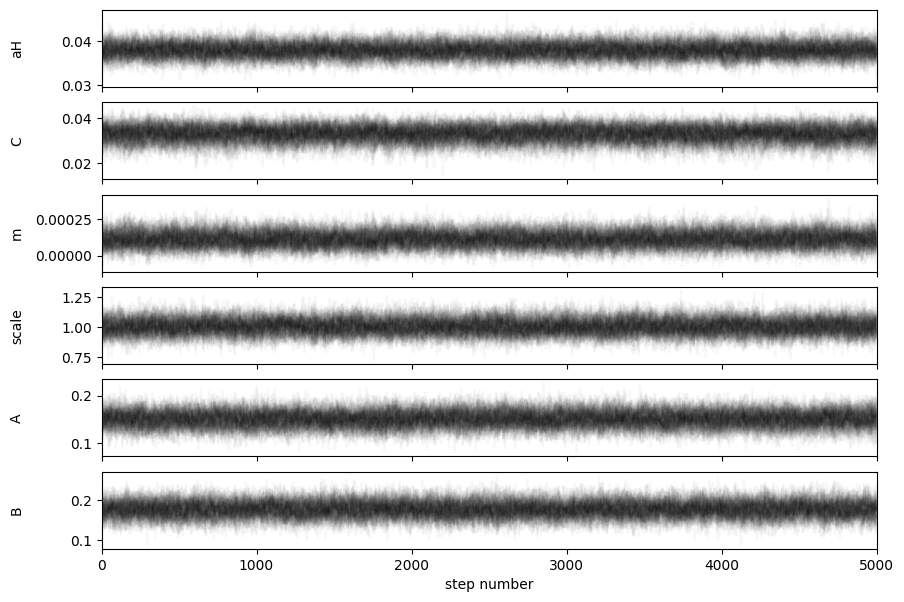

In [5]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)

print (np.shape(samples))
print (np.shape(samples[:, :, 1]))
labels = ["aH", "C", "m", "scale", "A", "B"]
for i in range(ndim):
    ax = axes[i]
    # when you pass ax.plot a pair, the columns represent seperate data sets
    ax.plot(np.transpose(samples[:, :, i]), "k", alpha=0.03)
    ax.set_xlim(0, np.shape(samples)[1])
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(100, 5000, 6)
(470000, 6)


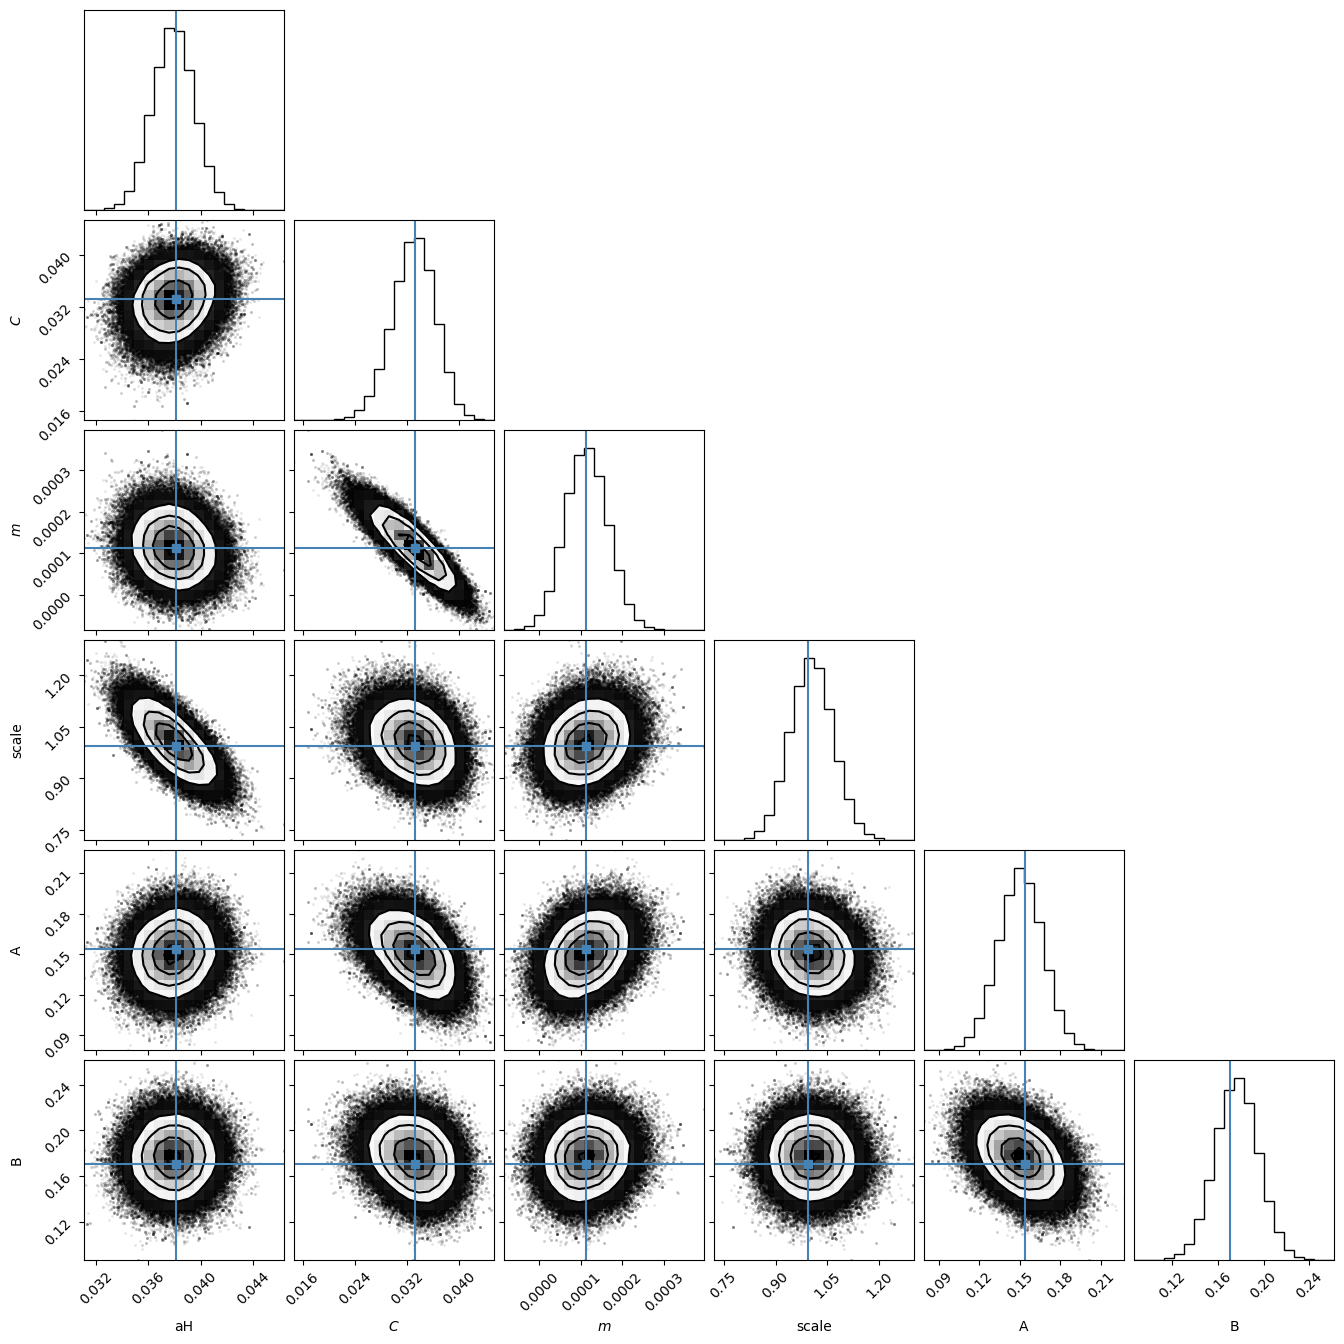

In [6]:
import corner
print(np.shape(samples))
samples_corner = samples[:, 300:, :].reshape((-1, ndim))
print(np.shape(samples_corner))
fig = corner.corner(samples_corner, labels=["aH", "$C$", "$m$", "scale", "A", "B"],
                      truths=[aH_fit, C_fit, m_fit, scale_fit, A_fit, B_fit])

if False:
    plt.savefig('pics/corner_sixParameter_fit_corr.png')